In [49]:
import os
import re
import numpy as np
import ast
import json
import matplotlib.pyplot as plt

# Use the current directory as the log_dir
log_dir = "."

# Initialize data storage
experiment_data = {}
# Regular expression to match accuracy values
pattern = r"'avr_accuracy': \[(.*?)\]"

# Read all log files
for filename in os.listdir(log_dir):
    if filename.startswith("experiment_log_") and filename.endswith(".json"):
        runs = {}
        filepath = os.path.join(log_dir, filename)
        experiment_id = int(filename.split("_")[-1].split(".")[0])  # Extract the experiment ID

        with open(filename, "r") as file:
            log_text = file.read()
            # Search for matches after '[SUMMARY]'
            match = re.findall(pattern, log_text, re.DOTALL)
            for run in range(len(match)):
                extracted_string = match[run].strip().replace('\n', '').replace('\t', '')
                avr_accuracy_list = ast.literal_eval(f"[{extracted_string}]")
                runs[run] = avr_accuracy_list
            array = np.array([[value[1] for value in values] for values in runs.values()])
            experiment_data[experiment_id] = array

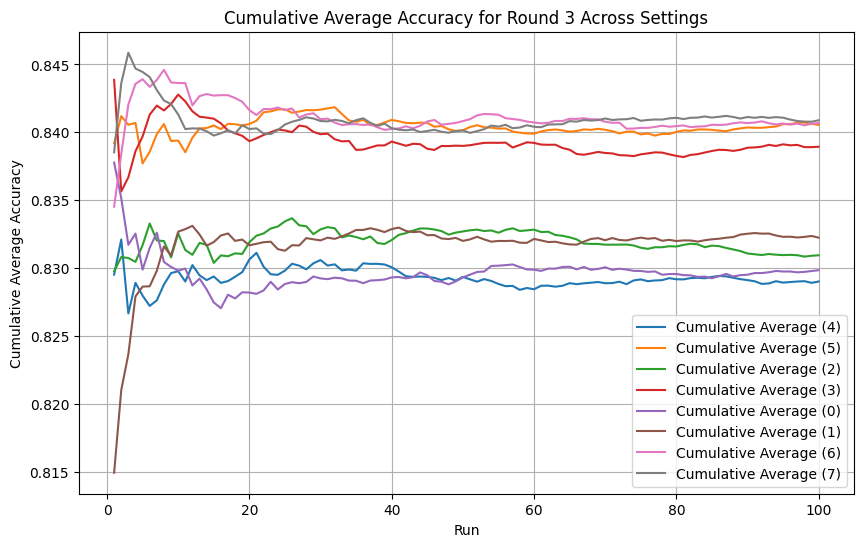

In [68]:
# Inicialize a figura do gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre cada configuração em experiment_data
for setting, data in experiment_data.items():
    # Extrair a terceira coluna (round 3)
    round_3_accuracies = data[:, 2]

    # Calcular a média cumulativa para o round 3
    cumulative_avg = np.cumsum(round_3_accuracies) / (np.arange(1, len(round_3_accuracies) + 1))

    # Plotar a curva de média cumulativa para esta configuração
    plt.plot(np.arange(1, len(cumulative_avg) + 1), cumulative_avg, label=f"Cumulative Average ({setting})")

# Adicionar título e rótulos
plt.title("Cumulative Average Accuracy for Round 3 Across Settings")
plt.xlabel("Run")
plt.ylabel("Cumulative Average Accuracy")
plt.grid(True)
plt.legend()
plt.show()

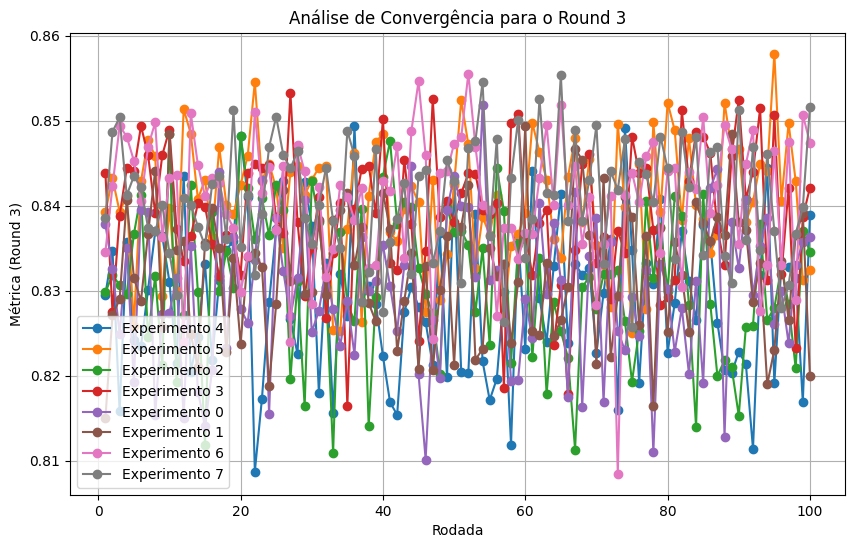